# EM CONSTRUÇÃO

# CHALLENGE DADOS

Neste challenger o desafio com esses dados, tentar modelar um classificador capaz de encontrar potenciais clientes inadimplentes e solucionar o problema do Alura Cash.

### OS DADOS

Foi disponibilizado um arquivo DUMP que fiz os tratamentos necessários, unir as tabelas e exportei como um .csv

DICIONÁRIO DE DADOS:

* **pessoa idade:** Idade da pessoa em anos que solicia empréstimo.   
* **salario_ano:** Salário anual da pessoa solicitante.
* **propriedade_sit:** Situação da propriedade que a pessoa possui: Alugada, Própria, Hipotecada e Outros.
* **ano_trabalhado:** Tempo em anos que a pessoa trabalhou
* **motivo_emprestimo:** Motivo do empréstimo: Pagamento de debitos, Pessoal, Educativo, Medico, Empreendimento, Melhora do lar
* **pontuacao_emprestimos:** Pontuação de empréstimos, por nível variando de A a G
* **vl_total:** Valor total do empréstimo solicitado
* **tx_juros:** Taxa de juros
* **inadimplencia:** Possibilidade de inadimplência
* **tx_renda_divida:** Renda percentual entre o valor total do empréstimo e o salário anual
* **hst_inadimplencia:** Indica se a pessoa já foi inadimplente 1 SIM, 0 NÃO
* **hst_primeiro_credito:** Tempo - em anos - desde a primeira solicitação de crédito ou aquisição de um cartão de crédito

## IMPORTAÇÕES DE BIBLIOTECAS

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## IMPORTAÇÃO DO DATASET

In [2]:
dados = pd.read_csv('dados_juntos.csv', sep=';')
dados.head()

,pessoa_idade,salario_ano,propriedade_sit,ano_trabalhado,motivo_emprestimo,pontuacao_emprestimos,vl_total,tx_juros,inadimplencia,tx_renda_divida,hst_inadimplencia,hst_primeiro_credito
0,23,108000,Hipotecada,5,Pagamento de debitos,D,10000,0.00,1.0,0.09,1.0,2
1,31,35000,Hipotecada,2,Pagamento de debitos,B,10225,9.99,0.0,0.29,0.0,6
2,22,14400,Propria,0,Pessoal,B,2100,11.14,0.0,0.15,0.0,4
3,21,47580,Hipotecada,5,Educativo,A,14000,6.03,0.0,0.29,0.0,2
4,33,115000,Hipotecada,10,Medico,B,25000,11.86,0.0,0.22,0.0,8


In [3]:
print(f'O dataset tem {dados.shape[0]} Linhas e {dados.shape[1]} Colunas')

O dataset tem 34485 Linhas e 12 Colunas


In [4]:
#Verificando os tipos dos dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34485 entries, 0 to 34484
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pessoa_idade           34485 non-null  int64  
 1   salario_ano            34485 non-null  int64  
 2   propriedade_sit        34485 non-null  object 
 3   ano_trabalhado         34485 non-null  int64  
 4   motivo_emprestimo      34485 non-null  object 
 5   pontuacao_emprestimos  34176 non-null  object 
 6   vl_total               34485 non-null  int64  
 7   tx_juros               34485 non-null  float64
 8   inadimplencia          34142 non-null  float64
 9   tx_renda_divida        34485 non-null  float64
 10  hst_inadimplencia      34119 non-null  float64
 11  hst_primeiro_credito   34485 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.2+ MB


## TRATAMENTO DOS DADOS

### Verificando e tratando dados nulos

In [5]:
dados.isna().sum()

pessoa_idade               0
salario_ano                0
propriedade_sit            0
ano_trabalhado             0
motivo_emprestimo          0
pontuacao_emprestimos    309
vl_total                   0
tx_juros                   0
inadimplencia            343
tx_renda_divida            0
hst_inadimplencia        366
hst_primeiro_credito       0
dtype: int64

In [6]:
dados.propriedade_sit.unique()

array(['Hipotecada', 'Propria', 'Alugada', 'Outros', '-'], dtype=object)

In [7]:
#Removendo os dados nulos da variável propriedade_sit
dados.propriedade_sit.replace('-', '', inplace=True) #Substituindo o valor '-' por ''
index = dados.query('propriedade_sit == ""').index #Selecionando as linhas vazias que serão excluidas
dados.drop(index=index, inplace=True) #Deletando as linhas vazias

In [8]:
dados.motivo_emprestimo.unique()

array(['Pagamento de debitos', 'Pessoal', 'Educativo', 'Medico',
       'Empreendimento', 'Melhora do lar', '-'], dtype=object)

In [9]:
#Removendo os dados da variávei motivo_emprestimo
dados.motivo_emprestimo.replace('-', '', inplace=True) #Substituindo o valor '-' por ''
index = dados.query('motivo_emprestimo == ""').index #Selecionando as linhas vazias que serão excluidas
dados.drop(index=index, inplace=True) #Deletando as linhas vazias

In [10]:
dados.pontuacao_emprestimos.unique()

array(['D', 'B', 'A', 'C', 'E', 'F', nan, 'G'], dtype=object)

In [11]:
#Removendo os dados da variávei pontuacao_emprestimos
dados.dropna(subset=['pontuacao_emprestimos'], inplace=True)

In [12]:
dados.pessoa_idade.unique()

array([ 23,  31,  22,  21,  33,  41,  52,  24,  29,  30,  51,  37,  28,
        26,  25,  35,  27,  34,  32,  43,  47,  54,  48,   0,  38,  40,
        36,  45,  44,  46,  39,  42,  53,  50,  49,  70,  61,  57,  78,
        64,  58,  20,  60,  65,  69,  84,  55,  59,  67,  76,  56,  62,
        94,  66, 144,  73, 123,  63,  80], dtype=int64)

In [13]:
#Média da idade
dados.pessoa_idade.mean()

27.529352286920837

In [14]:
#Mediana da idade
dados.pessoa_idade.median()

26.0

In [15]:
#Substituindo as idades que estão com valores 0
dados.pessoa_idade.replace(0, 27, inplace=True)

In [16]:
dados.ano_trabalhado.unique()

array([  5,   2,   0,  10,   3,   1,   8,   6,   7,  14,   9,   4,  11,
        19,  15,  20,  12,  18,  27,  23,  16,  17,  13,  24,  21,  28,
        26,  22,  25, 123,  41,  30,  31,  38,  34,  29], dtype=int64)

In [17]:
#Removendo outlier do ano_trabalhando
dados.drop(dados[dados["ano_trabalhado"] >= 123].index, inplace=True)

In [18]:
dados.inadimplencia

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34480    0.0
34481    0.0
34482    1.0
34483    1.0
34484    0.0
Name: inadimplencia, Length: 33624, dtype: float64

In [19]:
#Removendo dados nulos da coluna hst_inadimplencia
dados.dropna(subset=['hst_inadimplencia'],inplace=True)

In [20]:
#Removendo dados nulos da coluna inadimplencia
dados.dropna(subset=['inadimplencia'],inplace=True)

In [21]:
dados.reset_index(inplace=True, drop=True)

In [22]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33127 entries, 0 to 33126
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   pessoa_idade           33127 non-null  int64  
 1   salario_ano            33127 non-null  int64  
 2   propriedade_sit        33127 non-null  object 
 3   ano_trabalhado         33127 non-null  int64  
 4   motivo_emprestimo      33127 non-null  object 
 5   pontuacao_emprestimos  33127 non-null  object 
 6   vl_total               33127 non-null  int64  
 7   tx_juros               33127 non-null  float64
 8   inadimplencia          33127 non-null  float64
 9   tx_renda_divida        33127 non-null  float64
 10  hst_inadimplencia      33127 non-null  float64
 11  hst_primeiro_credito   33127 non-null  int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.0+ MB


In [23]:
print(f'O dataset tem {dados.shape[0]} Linhas e {dados.shape[1]} Colunas')

O dataset tem 33127 Linhas e 12 Colunas


### Outliers

<AxesSubplot:xlabel='pessoa_idade'>

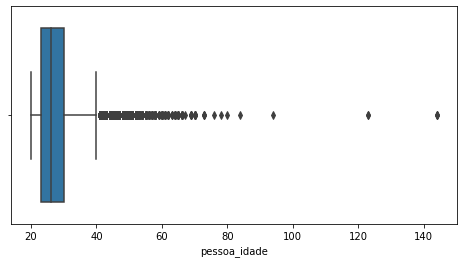

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dados, x='pessoa_idade')

In [25]:
#Removendo outlier da idade
dados.drop(dados[dados["pessoa_idade"] >= 120].index, inplace=True)

<AxesSubplot:xlabel='ano_trabalhado'>

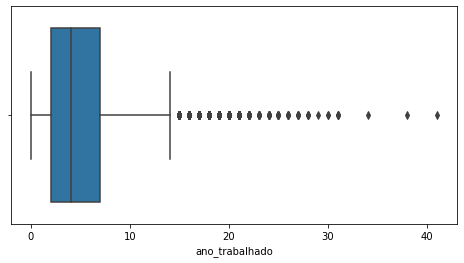

In [26]:
plt.figure(figsize=(8,4))
sns.boxplot(data=dados, x='ano_trabalhado')

In [27]:
#Removendo outlier da idade
dados.drop(dados[dados["ano_trabalhado"] >= 120].index, inplace=True)

### Variáveis categóricas

In [28]:
#Criação de dummies,para converter os dados categórios do tipo string em categóricos numéricos
dados = pd.get_dummies(data = dados, columns = ['propriedade_sit','motivo_emprestimo','pontuacao_emprestimos'])

In [29]:
dados.head()

,pessoa_idade,salario_ano,ano_trabalhado,vl_total,tx_juros,inadimplencia,tx_renda_divida,hst_inadimplencia,hst_primeiro_credito,propriedade_sit_Alugada,...,motivo_emprestimo_Melhora do lar,motivo_emprestimo_Pagamento de debitos,motivo_emprestimo_Pessoal,pontuacao_emprestimos_A,pontuacao_emprestimos_B,pontuacao_emprestimos_C,pontuacao_emprestimos_D,pontuacao_emprestimos_E,pontuacao_emprestimos_F,pontuacao_emprestimos_G
0,23,108000,5,10000,0.00,1.0,0.09,1.0,2,0,...,0,1,0,0,0,0,1,0,0,0
1,31,35000,2,10225,9.99,0.0,0.29,0.0,6,0,...,0,1,0,0,1,0,0,0,0,0
2,22,14400,0,2100,11.14,0.0,0.15,0.0,4,0,...,0,0,1,0,1,0,0,0,0,0
3,21,47580,5,14000,6.03,0.0,0.29,0.0,2,0,...,0,0,0,1,0,0,0,0,0,0
4,33,115000,10,25000,11.86,0.0,0.22,0.0,8,0,...,0,0,0,0,1,0,0,0,0,0


### Correlação

<AxesSubplot:>

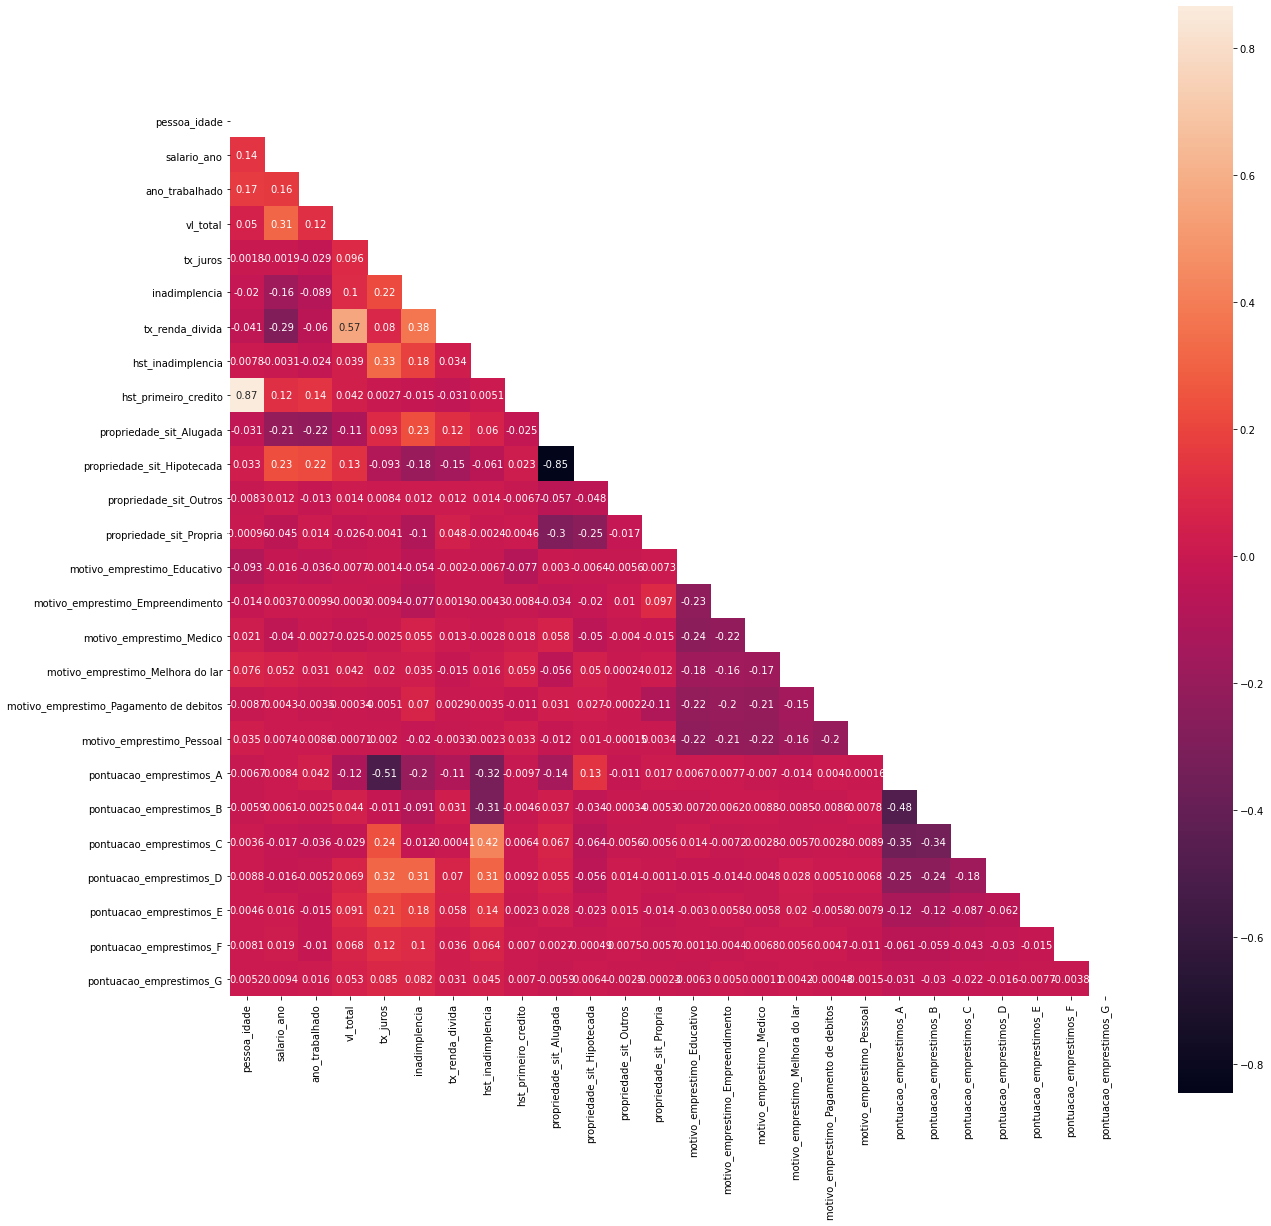

In [30]:
# Plotando a correlação entre as variáveis
plt.figure(figsize=(20,20))
corr = dados.corr()
mask = np.triu(np.ones_like(dados.corr())) 
sns.heatmap(corr, square = True, annot = True, mask=mask)

## MODELO

In [31]:
#Convertendo de float para int
dados['inadimplencia'] = dados['inadimplencia'].astype(int)

In [38]:
# Realizando a divisão dos dados
X = dados.drop(columns = ['inadimplencia'])
y = dados['inadimplencia']

### Balanceamento

Text(0, 0.5, 'inadimplencia')

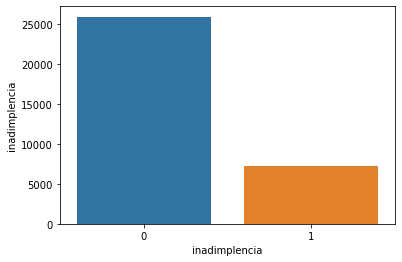

In [40]:
ax = sns.countplot(x='inadimplencia', data=dados)
ax.set_ylabel('inadimplencia')

In [44]:
dados['inadimplencia'].value_counts(normalize=True)

0    0.782018
1    0.217982
Name: inadimplencia, dtype: float64

Se não balanceamos esses dados de alguma forma, eles podem acarretar em problemas na construção de modelos e na geração de previsões.

In [45]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

A = dados.drop('inadimplencia', axis = 1)
b = dados['inadimplencia']

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
A, b = smt.fit_resample(A, b)  # Realiza a reamostragem do conjunto de dados
dados = pd.concat([A, b], axis=1)  # Concatena a variável target (b) com as features (A)

Text(0, 0.5, 'inadimplencia')

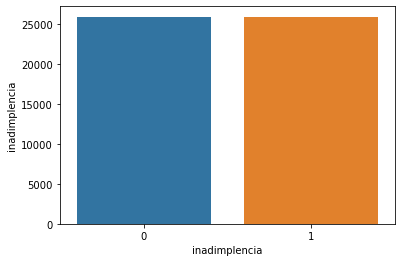

In [46]:
ax = sns.countplot(x='inadimplencia', data=dados)
ax.set_ylabel('inadimplencia')

### Normalização

In [47]:
scaler = StandardScaler()
X = scaler.fit_transform(X) #Normalizando os dados
X

array([[-0.76173066,  0.80775246,  0.09188882, ..., -0.17452118,
        -0.08614741, -0.0439999 ],
       [ 0.53186893, -0.58114639, -0.64731328, ..., -0.17452118,
        -0.08614741, -0.0439999 ],
       [-0.92343061, -0.97308223, -1.14011468, ..., -0.17452118,
        -0.08614741, -0.0439999 ],
       ...,
       [-0.27663082, -0.20070226,  0.83109092, ..., -0.17452118,
        -0.08614741, -0.0439999 ],
       [-0.60003071, -0.70310313,  0.58469022, ..., -0.17452118,
        -0.08614741, -0.0439999 ],
       [-0.11493087, -0.03890506, -0.40091258, ..., -0.17452118,
        -0.08614741, -0.0439999 ]])

### Treino e Teste

In [53]:
#Definindo uma SEED
SEED = 1234
np.random.seed(SEED)

# Separando os dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

In [74]:
#Função para ver as métricas
def metricas(y_test, y_pred):
    acuracia = accuracy_score(y_test, y_pred)*100
    precisao = precision_score(y_test, y_pred)*100
    recall = recall_score(y_test, y_pred)*100
    
    print('A acurácia do modelo foi de %.2f%%' %acuracia)
    print('A precisão do modelo foi de %.2f%%'%precisao)
    print('A taxa de recall do modelo foi de %.2f%%'% recall)
    
    mc = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix = mc)
    display.plot()

## Modelo DecisionTree

In [54]:
arvore = DecisionTreeClassifier(random_state=SEED)
arvore.fit(X_train, y_train)
arvore_pred = arvore.predict(X_test)

A acurácia do modelo foi de 88.66%
A precisão do modelo foi de 73.04%
A taxa de recall do modelo foi de 75.84%


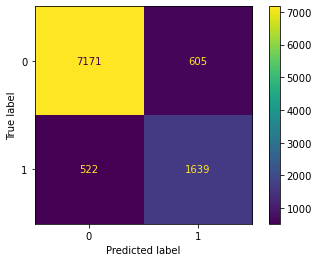

In [63]:
metricas(y_test, arvore_pred)

## MODELO KNN

Vamos utilizar o método conhecido como método cotovelo para saber a quantidade ideal de clusters ( K vizinhos).

Text(0, 0.5, 'Taxa de error')

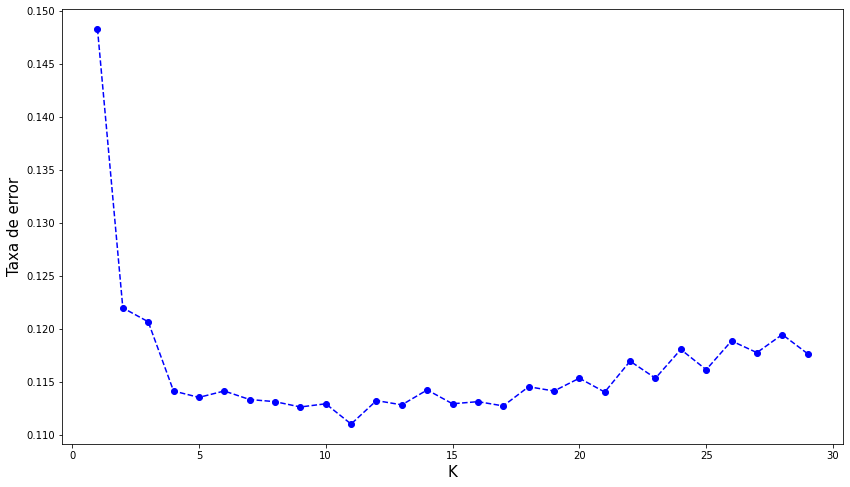

In [65]:
error_rate = []

for i in range(1, 30):
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    knn_y_pred = knn_model.predict(X_test)
    error_rate.append(np.mean(knn_y_pred != y_test))
#Visualização da variação dos clusters
plt.figure(figsize=(14,8))
plt.plot(range(1,30), error_rate, color='blue', ls='--', marker='o')
plt.xlabel('K',  fontsize=15)
plt.ylabel('Taxa de error', fontsize=15)

In [67]:
knn_modelo = KNeighborsClassifier(n_neighbors = 5) #Estanciando o modelo, n_neighbors é o número de clusters
knn_modelo.fit(X_train, y_train) #Treinando o modelo 
knn_pred = knn_modelo.predict(X_test) #Prevendo dados

A acurácia do modelo foi de 88.65%
A precisão do modelo foi de 83.87%
A taxa de recall do modelo foi de 59.19%


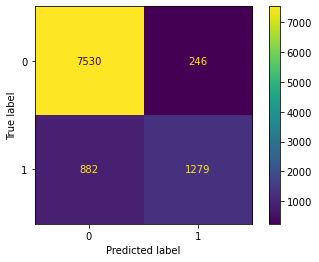

In [68]:
metricas(y_test, knn_pred)

## MODELO RandomForest

In [72]:
rfc = RandomForestClassifier(random_state= SEED)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

A acurácia do modelo foi de 92.96%
A precisão do modelo foi de 96.15%
A taxa de recall do modelo foi de 70.43%


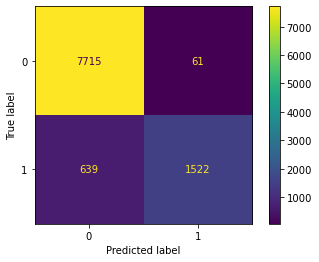

In [73]:
metricas(y_test, rfc_pred)